In this repository we are going to work on simple regression problem using self made data

In [1]:
# imports

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
x_data


array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [4]:
noise = np.random.randn(len(x_data))

y = mx+ b
where b = 5 + noise
and m =0.5

In [5]:
y_true = (0.5* x_data) + 5 +noise    

In [6]:
# creating dataframe (Two-dimensional size-mutable, potentially heterogeneous tabular data
# structure with labeled axes (rows and columns))

x_df = pd.DataFrame(data = x_data,columns = ['X_Data'])

In [7]:
y_df = pd.DataFrame(data = y_true,columns = ['Y'])

In [8]:
x_df.head()       # gives first 5 rows of dataframe

,X_Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [9]:
y_df.head()

,Y
0,5.400024
1,5.364693
2,4.836407
3,6.093663
4,7.422175


In [10]:
# concatenating data

my_data = pd.concat([x_df,y_df],axis = 1) # axis helps to concatenate columnwise

In [11]:
my_data.head()

,X_Data,Y
0,0.00000,5.400024
1,0.00001,5.364693
2,0.00002,4.836407
3,0.00003,6.093663
4,0.00004,7.422175


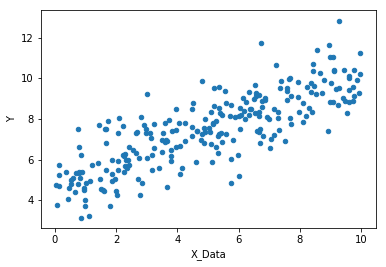

In [13]:
my_data.sample(n =250).plot(kind ='scatter',x = 'X_Data',y = 'Y')    #gets 250 random samples to plot as our data has a million data points 

 we need to fit a line through this data but we cannot pass whole million data points 
 thus we pass data in batches


In [15]:
batch_size =8    # take 8 datapoints at a time

In [16]:
np.random.random(2)

array([0.13316239, 0.70113351])

In [17]:
# y = mx+b
# setting values for m and b 

m = tf.Variable(0.13)    
b = tf.Variable(0.70)

In [18]:
 # creating placeholders for x and y
xph = tf.placeholder(tf.float32,[batch_size])


In [19]:
yph = tf.placeholder(tf.float32,[batch_size])

In [20]:
y_model = m*xph + b              # required output

In [21]:
# loss  cost function
error = tf.reduce_sum(tf.square(yph - y_model))

In [24]:
# Decrease the error using optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [25]:
init = tf.global_variables_initializer()

In [33]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size = batch_size)  # choosing 8 data points at random to train the model(supervised learning)

        feed={xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
        
        model_m, model_b = sess.run([m,b])

In [34]:
model_m

0.5197339

In [35]:
model_b

4.979763

In [60]:
y_hat = x_data * model_m + model_b

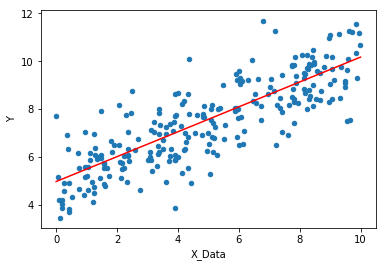

In [62]:
my_data.sample(n=250).plot(kind='scatter',x='X_Data',y='Y')
plt.plot(x_data,y_hat,'r')